In [1]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

In [2]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
gdf = gpd.read_file("data/읍면동/emd.shp", encoding='euc-kr')
gdf

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5061,52800390,Sangseo-myeon,상서면,"POLYGON ((924979.638 1740610.214, 924985.428 1..."
5062,52800400,Haseo-myeon,하서면,"POLYGON ((924910.563 1749481.985, 924971.300 1..."
5063,52800410,Julpo-myeon,줄포면,"POLYGON ((929554.188 1736493.399, 929554.106 1..."
5064,52800420,Wido-myeon,위도면,"MULTIPOLYGON (((890358.231 1737258.351, 890358..."


In [4]:
# 서울시 추출: 11로 시작하는 데이터만 필터링
gdf = gdf[gdf['EMD_CD'].str.startswith('11')]

In [5]:
# 영어 이름 열 없애기
gdf = gdf.drop('EMD_ENG_NM', axis=1)

In [24]:
gdf

,EMD_CD,EMD_KOR_NM,geometry
0,11110101,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...
462,11740106,둔촌동,"POLYGON ((969669.593 1948748.489, 969656.716 1..."
463,11740107,암사동,"POLYGON ((968514.203 1950677.234, 968505.336 1..."
464,11740108,성내동,"POLYGON ((967686.073 1948534.011, 967685.029 1..."
465,11740109,천호동,"POLYGON ((968336.280 1950222.697, 968337.437 1..."


<Axes: >

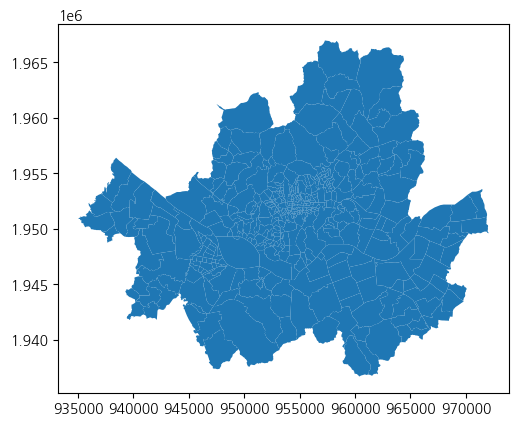

In [6]:
gdf.plot()

In [7]:
# gdf_seoul의 전체 범위를 구합니다.
minx, miny, maxx, maxy = gdf.geometry.total_bounds

# 500m x 500m 격자 생성을 위한 x, y 좌표 배열 생성
x_coords = np.arange(minx, maxx, 500)
y_coords = np.arange(miny, maxy, 500)

# 격자(Polygon) 생성
grid = []
for x in x_coords:
    for y in y_coords:
        grid.append(box(x, y, x+500, y+500))

# GeoDataFrame으로 변환
grid_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(grid))

In [8]:
grid_gdf

,geometry
0,"POLYGON ((935535.255 1936665.548, 935535.255 1..."
1,"POLYGON ((935535.255 1937165.548, 935535.255 1..."
2,"POLYGON ((935535.255 1937665.548, 935535.255 1..."
3,"POLYGON ((935535.255 1938165.548, 935535.255 1..."
4,"POLYGON ((935535.255 1938665.548, 935535.255 1..."
...,...
4570,"POLYGON ((972535.255 1964665.548, 972535.255 1..."
4571,"POLYGON ((972535.255 1965165.548, 972535.255 1..."
4572,"POLYGON ((972535.255 1965665.548, 972535.255 1..."
4573,"POLYGON ((972535.255 1966165.548, 972535.255 1..."


<Axes: >

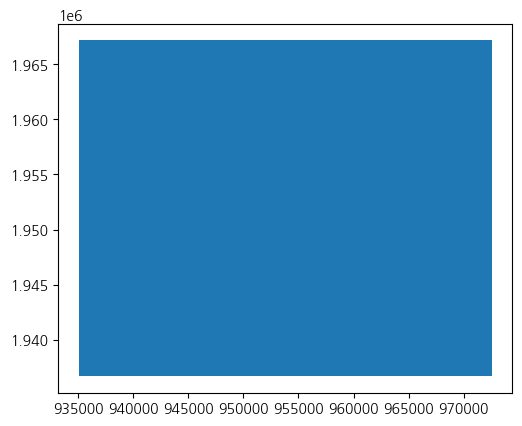

In [9]:
grid_gdf.plot()

In [10]:
seoul = gpd.read_file("data/시도/ctp_rvn.shp", encoding='euc-kr')

In [11]:
seoul.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((965645.274 1960046.271, 965641.199 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1132664.900 1655415.815, 11326..."
2,27,Daegu,대구광역시,"POLYGON ((1090672.656 1766591.493, 1090673.465..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((847834.755 1881816.658, 847840..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


In [12]:
seoul = seoul[seoul['CTP_KOR_NM'] == '서울특별시']
seoul

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((965645.274 1960046.271, 965641.199 1..."


In [19]:
overlay_gdf = gpd.overlay(seoul, grid_gdf, how='intersection')

C:\Users\1qlqj\AppData\Local\Temp\ipykernel_7980\2725817897.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM[" ...

  overlay_gdf = gpd.overlay(grid_gdf, seoul, how='intersection')


In [20]:
overlay_gdf

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"MULTIPOLYGON (((935535.255 1950328.380, 935525..."
1,11,Seoul,서울특별시,"POLYGON ((935535.255 1950665.548, 935293.720 1..."
2,11,Seoul,서울특별시,"POLYGON ((935725.982 1950165.548, 935725.680 1..."
3,11,Seoul,서울특별시,"POLYGON ((935535.255 1950665.548, 936035.255 1..."
4,11,Seoul,서울특별시,"POLYGON ((936035.255 1951165.548, 936035.255 1..."
...,...,...,...,...
2623,11,Seoul,서울특별시,"POLYGON ((971535.255 1950665.548, 971535.255 1..."
2624,11,Seoul,서울특별시,"POLYGON ((971535.255 1951165.548, 971535.255 1..."
2625,11,Seoul,서울특별시,"POLYGON ((971535.255 1951665.548, 971535.255 1..."
2626,11,Seoul,서울특별시,"POLYGON ((971535.255 1952165.548, 971535.255 1..."


<Axes: >

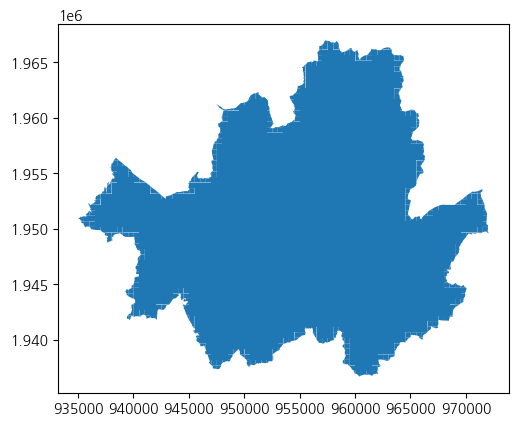

In [21]:
overlay_gdf.plot()

In [22]:
# grid_gdf에 id 열 추가
overlay_gdf['id'] = pd.Series(range(1, len(overlay_gdf) + 1)).astype(int)

In [23]:
overlay_gdf

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,id
0,11,Seoul,서울특별시,"MULTIPOLYGON (((935535.255 1950328.380, 935525...",1
1,11,Seoul,서울특별시,"POLYGON ((935535.255 1950665.548, 935293.720 1...",2
2,11,Seoul,서울특별시,"POLYGON ((935725.982 1950165.548, 935725.680 1...",3
3,11,Seoul,서울특별시,"POLYGON ((935535.255 1950665.548, 936035.255 1...",4
4,11,Seoul,서울특별시,"POLYGON ((936035.255 1951165.548, 936035.255 1...",5
...,...,...,...,...,...
2623,11,Seoul,서울특별시,"POLYGON ((971535.255 1950665.548, 971535.255 1...",2624
2624,11,Seoul,서울특별시,"POLYGON ((971535.255 1951165.548, 971535.255 1...",2625
2625,11,Seoul,서울특별시,"POLYGON ((971535.255 1951665.548, 971535.255 1...",2626
2626,11,Seoul,서울특별시,"POLYGON ((971535.255 1952165.548, 971535.255 1...",2627


In [18]:
overlay_gdf.to_file("data/seoul_500_grid.shp", encoding='euc-kr')